TASK - 2
<br>
PREDICTING THE OPTIMAL NO.OF CLUSTERS FOR AN IRIS DATASET

BY BHARADWAJ

LinkedIn : https://www.linkedin.com/in/bharadwaj-v-672820225/
<br>
Github : https://github.com/Bharadwaja04

For this code I used three libraries

1. Pandas
2. Matplotlib
3. sklearn

From sklearn library I imported KMeans for my K-Means clustering

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

I read the data using pandas

In [34]:
df = pd.read_csv('Iris.csv')

In [35]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


I dropped Id because It is of no use

In [36]:
df = df.drop('Id',axis = 1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Excluding species I took each row as a data point and will do the clustering

In [39]:
points = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

In [40]:
points

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Below I used StandardScaler Method to get a zero mean and unit variance
<br>
<br>
StandardScaler makes sure that each feature contributes equally to the distance metric used in clustering, and thus produces a more unbiased clustering result.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(points)

I used elbow method to make sure which would be the best fit for clustering

In [42]:
sse =[]
for k in range(1,10):
    km = KMeans(n_clusters = k)
    km.fit(points)
    sse.append(km.inertia_)

c:\Users\Bharadwaj\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


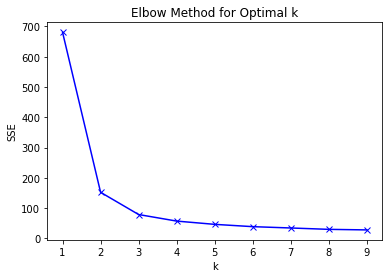

In [43]:
plt.plot(range(1,10),sse,'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

As you can see int he graph above that there is a bendature at 2 and 3, so it states that clustering would be good with no.of clusters equal to 2 or 3.


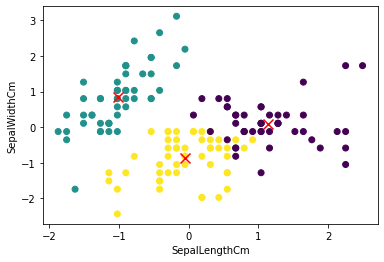

In [46]:
km = KMeans(n_clusters=3)
cluster_labels = km.fit_predict(X_scaled)

centroids = km.cluster_centers_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x', s=100)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

The cross marks above represent the centroids


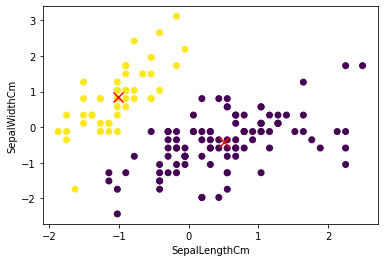

In [47]:
km = KMeans(n_clusters=2)
cluster_labels = km.fit_predict(X_scaled)

centroids = km.cluster_centers_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x', s=100)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In the above plots the each cluster represent the different features of Sepal length adn Sepal width
<br><br>
For three clusters:<br>
Cluster 1 (Blue): Data points in this cluster have relatively lower values of Sepal Length and   higher values of Sepal Width.<br>
Cluster 2 (Yellow): Data points in this cluster have moderate values of Sepal Length and Sepal Width.<br>
Cluster 3 (purple): Data points in this cluster have higher values of Sepal Length and lower values of Sepal Width.<br>
<br>
<br>
Two Clusters:
<br>
Cluster 1 (Yellow): Data points in this cluster have relatively lower values of Sepal Length and higher values of Sepal Width.<br>
Cluster 2 (Purple): Data points in this cluster have higher values of Sepal Length and lower values of Sepal Width.
